> **원본:** 이 노트북은 [Daniel Bourke](https://github.com/mrdbourke)의 [Learn PyTorch for Deep Learning](https://github.com/mrdbourke/pytorch-deep-learning) 자료를 한국어로 번역한 것입니다. 원본 저장소: https://github.com/mrdbourke/pytorch-deep-learning

<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch 워크플로우 기초

머신러닝과 딥러닝의 본질은 과거의 데이터를 가져와서, 그 안의 패턴을 발견하기 위한 알고리즘(신경망과 같은)을 구축하고, 발견된 패턴을 사용하여 미래를 예측하는 것입니다.

이를 수행하는 방법은 많고, 새로운 방법들이 계속 발견되고 있습니다.

하지만 작게 시작해보겠습니다.

직선부터 시작하는 것은 어떨까요?

그리고 PyTorch로 그 직선에 맞는 모델을 구축할 수 있는지 살펴보겠습니다.



## 이번 모듈에서 다룰 내용

이 모듈에서는 표준 PyTorch 워크플로우를 다룹니다(필요에 따라 일부 단계를 조정/변경할 수 있지만, 전반적인 큰 흐름을 포괄합니다).

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

지금은 이 워크플로우를 사용해 단순한 직선을 예측해보겠지만, 실제 작업 문제에 따라 동일한 단계를 반복/변형하여 사용할 수 있습니다.

구체적으로 다음을 다룹니다:

| **주제** | **내용** |
| ----- | ----- |
| **1. 데이터 준비** | 데이터는 거의 무엇이든 될 수 있지만, 시작을 위해 단순한 직선을 생성하겠습니다. |
| **2. 모델 구축** | 데이터의 패턴을 학습할 모델을 만들고, **손실 함수**, **옵티마이저**를 선택하며 **학습 루프**를 구성합니다. |
| **3. 데이터에 모델 적합(학습)** | 데이터와 모델이 준비되었으니, 모델이 (**학습**) 데이터에서 패턴을 찾도록 시도합니다. |
| **4. 예측 및 모델 평가(추론)** | 모델이 데이터에서 패턴을 찾았으니, 실제 (**테스트**) 데이터와 비교하여 성능을 평가합니다. |
| **5. 모델 저장 및 불러오기** | 모델을 다른 곳에서 사용하거나 나중에 다시 사용할 수 있도록 저장/불러오기를 다룹니다. |
| **6. 통합하기** | 위의 모든 단계를 하나로 통합합니다. |


## 어디서 도움을 받을 수 있나요?

이 과정의 모든 자료는 [GitHub](https://github.com/mrdbourke/pytorch-deep-learning)에 있습니다.

문제가 생기면 [Discussions 페이지](https://github.com/mrdbourke/pytorch-deep-learning/discussions)에 질문을 남길 수도 있습니다.

또한 [PyTorch 개발자 포럼](https://discuss.pytorch.org/)도 있습니다. PyTorch 관련 모든 것에 매우 유용한 장소입니다.

나중에 참조할 수 있도록, 이번에 다룰 내용을 딕셔너리로 정리해두겠습니다.


In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

이제 이 모듈에 필요한 것들을 가져오겠습니다.

`torch`, `torch.nn`(`nn`은 neural network의 약자로, PyTorch에서 신경망을 생성하기 위한 빌딩 블록을 포함합니다), 그리고 `matplotlib`을 사용하겠습니다.

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.11.0'

## 1. 데이터(준비와 로딩)

머신러닝에서 말하는 "데이터"는 상상하는 거의 모든 것이 될 수 있습니다. 숫자 표(거대한 엑셀 스프레드시트처럼), 각종 이미지, 동영상(유튜브에는 데이터가 아주 많죠!), 노래나 팟캐스트 같은 오디오 파일, 단백질 구조, 텍스트 등등.

![machine learning is a game of two parts: 1. turn your data into a representative set of numbers and 2. build or pick a model to learn the representation as best as possible](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)

머신러닝은 크게 두 부분의 게임입니다:
1. 어떤 형태이든 데이터를 숫자(표현, representation)로 바꿉니다.
2. 그 표현을 최대한 잘 학습할 수 있는 모델을 선택하거나 구축합니다.

때로는 1과 2를 동시에 수행할 수도 있습니다.

그런데 만약 데이터가 없다면요?

지금 우리가 딱 그런 상황입니다.

데이터가 없습니다.

하지만 만들어볼 수는 있죠.

직선 데이터를 생성해보겠습니다.

[선형 회귀](https://en.wikipedia.org/wiki/Linear_regression)로 **알려진 파라미터**(모델이 학습할 수 있는 값들)를 가진 데이터를 만들고, 이후 PyTorch로 [**경사하강법**](https://en.wikipedia.org/wiki/Gradient_descent)을 사용해 이 파라미터들을 추정하도록 모델을 구축할 수 있는지 살펴보겠습니다.

위 용어들이 아직은 낯설어도 괜찮습니다. 아래에서 실제로 사용해볼 것이고, 더 학습할 수 있는 자료도 덧붙여두겠습니다.


In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

훌륭합니다! 이제 `X`(**특징**)와 `y`(**레이블**) 간의 관계를 학습할 수 있는 모델을 구축하는 단계로 나아가겠습니다. 

### 학습/테스트 세트로 데이터 분할 

데이터가 준비되었습니다.

하지만 모델을 만들기 전에 데이터를 분할해야 합니다.

머신러닝 프로젝트에서 가장 중요한 단계 중 하나는 학습 세트와 테스트 세트(필요 시 검증 세트)를 만드는 것입니다.

각 데이터 분할은 특정 목적을 가집니다:

| 분할 | 목적 | 전체 데이터 비율 | 사용 빈도 |
| ----- | ----- | ----- | ----- |
| **학습 세트** | 모델이 이 데이터로부터 학습합니다(학기 중 공부한 강의 자료와 유사). | ~60-80% | 항상 |
| **검증 세트** | 모델을 이 데이터로 튜닝합니다(기말고사 전 모의고사와 유사). | ~10-20% | 자주(항상은 아님) |
| **테스트 세트** | 모델이 학습한 내용을 이 데이터로 평가합니다(학기 말 기말고사와 유사). | ~10-20% | 항상 |

지금은 학습 세트와 테스트 세트만 사용하겠습니다. 이는 모델이 학습할 데이터셋과 평가받을 데이터셋을 모두 갖는다는 의미입니다.

`X`와 `y` 텐서를 분할하여 만들 수 있습니다.

> **참고:** 실제 데이터에서는 이 단계가 보통 프로젝트 초기에 수행됩니다(테스트 세트는 다른 모든 데이터와 항상 분리되어 있어야 합니다). 모델이 학습 데이터에서 학습하고 테스트 데이터에서 평가되도록 하여 보지 못한 예시에 얼마나 잘 **일반화**하는지 가늠합니다.


In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

훌륭합니다. 학습용 40개 샘플(`X_train`, `y_train`)과 테스트용 10개 샘플(`X_test`, `y_test`)이 준비되었습니다.

우리가 만들 모델은 `X_train`과 `y_train` 사이의 관계를 학습하려고 하며, 이후 `X_test`와 `y_test`로 학습된 내용을 평가할 것입니다.

하지만 지금 우리의 데이터는 페이지 위 숫자일 뿐입니다.

시각화를 위한 함수를 만들어보겠습니다.

In [5]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

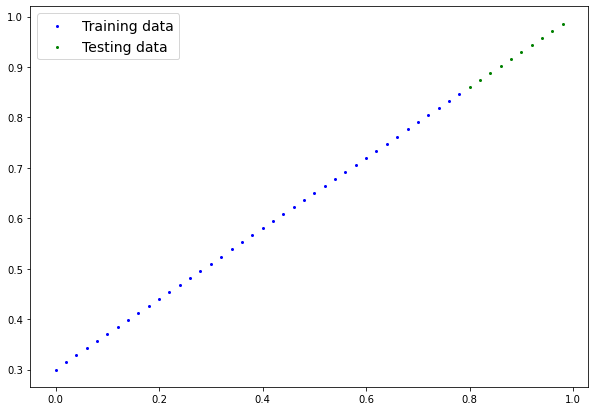

In [6]:
plot_predictions();

멋집니다!

이제 페이지 위의 숫자 나열이 아니라, 우리의 데이터가 직선임을 확인했습니다.

> **참고:** 데이터 탐색가의 모토를 소개할 때입니다… "시각화, 시각화, 시각화!"
>
> 데이터를 다루며 숫자로 바꿀 때마다 떠올리세요. 무엇이든 시각화할 수 있다면 이해에 큰 도움이 됩니다.
>
> 머신은 숫자를 사랑하고, 우리 인간도 숫자를 좋아하지만 동시에 눈으로 보는 것도 좋아합니다.

## 2. 모델 구축

데이터가 준비되었으니, 파란 점(학습 데이터)을 사용해 초록 점(테스트 데이터)을 예측하는 모델을 만들어보겠습니다.

바로 시작하겠습니다.

먼저 코드를 작성한 뒤 각 요소를 설명합니다.

순수 PyTorch로 표준 선형 회귀 모델을 재현해보겠습니다.

In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
            requires_grad=True, # <- can we update this value with gradient descent?
            dtype=torch.float # <- PyTorch loves float32 by default
        ))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

위 코드에는 볼 것이 제법 많습니다. 하나씩 나누어 살펴보겠습니다.

> **자료:** 신경망을 만들기 위해 Python 클래스를 사용합니다. Python의 클래스 표기가 익숙하지 않다면 [Real Python의 객체지향 프로그래밍 가이드](https://realpython.com/python3-object-oriented-programming/)를 몇 번 읽어보는 것을 권장합니다.



### PyTorch 모델 구축의 필수 요소

PyTorch에는 거의 모든 종류의 신경망을 만들 때 사용할 수 있는 핵심 모듈이 네 가지(전후) 있습니다.

바로 [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset), [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html)입니다. 지금은 앞의 두 가지에 집중하고, 나머지 두 가지는 이후에 다루겠습니다(무엇을 하는지 대략 짐작하실 수도 있습니다).

| PyTorch 모듈 | 역할 |
| ----- | ----- |
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | 계산 그래프를 구성하는 모든 빌딩 블록을 포함합니다(특정 방식으로 실행되는 일련의 계산). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#parameter) | `nn.Module`에서 사용할 텐서를 저장합니다. `requires_grad=True`이면 [**경사하강법**](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)으로 파라미터를 업데이트하기 위한 그래디언트가 자동 계산되며, 이를 흔히 "오토그라드"라고 합니다. |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) | 모든 신경망 모듈의 베이스 클래스입니다. 신경망의 모든 빌딩 블록은 이 클래스를 상속합니다. PyTorch에서 신경망을 만든다면 모델은 `nn.Module`을 상속해야 하며 `forward()` 메서드를 구현해야 합니다. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | 다양한 최적화 알고리즘을 포함합니다(`nn.Parameter`에 저장된 파라미터를 어떻게 바꿔 손실을 줄이고 경사하강을 개선할지 알려줍니다). |
| `def forward()` | 모든 `nn.Module` 서브클래스는 `forward()` 메서드를 필요로 하며, 특정 `nn.Module`에 전달된 데이터에 대해 수행할 계산을 정의합니다(예: 위의 선형 회귀 수식). |

위 설명이 복잡하게 느껴진다면 이렇게 생각하세요. PyTorch 신경망에서 거의 모든 것은 `torch.nn`에서 나옵니다.
* `nn.Module`은 큰 빌딩 블록(레이어)을 담습니다.
* `nn.Parameter`는 가중치와 편향 같은 작은 파라미터를 담습니다(이들을 조합해 `nn.Module`을 구성).
* `forward()`는 `nn.Module` 안에서 입력(데이터로 채워진 텐서)에 대해 어떻게 계산할지 큰 블록에 알려줍니다.
* `torch.optim`은 `nn.Parameter` 내부 파라미터를 개선해 입력 데이터를 더 잘 표현하도록 돕는 최적화 방법을 담습니다.

![a pytorch linear model with annotations](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png)
*`nn.Module`을 상속해 PyTorch 모델을 만드는 기본 빌딩 블록. `nn.Module`을 상속한 객체는 `forward()` 메서드를 반드시 정의해야 합니다.*

> **자료:** 필수 모듈과 사용 사례는 [PyTorch 치트시트](https://pytorch.org/tutorials/beginner/ptcheat.html)에서 더 확인하세요.



### PyTorch 모델 내용 확인
이제 준비가 되었으니, 우리가 만든 클래스로 모델 인스턴스를 생성하고 [`.parameters()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters)를 사용해 파라미터를 확인해보겠습니다. 

In [8]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

[`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict)를 사용하여 모델의 상태(모델이 보유한 값들)를 가져올 수도 있습니다.

In [9]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

`model_0.state_dict()`의 `weights`와 `bias` 값이 무작위 부동소수 텐서인 것을 확인할 수 있습니다.

이는 위에서 `torch.randn()`로 초기화했기 때문입니다.

요지는 무작위 파라미터에서 시작하여, 모델이 학습을 통해 우리 데이터에 가장 잘 맞는 파라미터(직선 데이터를 만들 때 하드코딩했던 `weight`와 `bias` 값에 해당)로 업데이트하도록 하는 것입니다.

> **연습:** 두 칸 위의 `torch.manual_seed()` 값을 바꿔보세요. 가중치와 편향 값이 어떻게 변하는지 확인합니다.

모델이 무작위 값으로 시작하므로, 현재 예측력은 낮습니다.



### `torch.inference_mode()`로 예측하기
이를 확인하기 위해 테스트 데이터 `X_test`를 전달하여 `y_test`를 얼마나 가깝게 예측하는지 보겠습니다.

데이터를 모델에 전달하면 모델의 `forward()` 메서드를 통해 우리가 정의한 계산을 수행하여 결과를 출력합니다.

예측을 수행해보겠습니다. 

In [10]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

음?

예측을 만들기 위해 [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html)를 [컨텍스트 매니저](https://realpython.com/python-with-statement/)로 사용한 것을 보셨을 것입니다(즉, `with torch.inference_mode():`).

이름에서 알 수 있듯 `torch.inference_mode()`는 추론(예측) 시 모델을 사용할 때 쓰입니다.

`torch.inference_mode()`는 **순전파**(데이터가 `forward()`를 통과)의 속도를 높이기 위해 여러 기능(예: 학습에는 필요하지만 추론에는 필요 없는 그래디언트 추적)을 끕니다.

> **참고:** 예전 PyTorch 코드에서는 추론에 `torch.no_grad()`를 사용하는 경우도 있습니다. 두 방식은 유사하지만 `torch.inference_mode()`가 더 새롭고 잠재적으로 더 빠르며 권장됩니다. 자세한 내용은 [PyTorch 트윗](https://twitter.com/PyTorch/status/1437838231505096708?s=20)을 참고하세요.

이제 예측을 만들었으니, 어떻게 보이는지 확인해보겠습니다. 

In [11]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


테스트 샘플 하나당 예측 값이 하나씩 있는 것을 볼 수 있습니다.

이는 우리가 사용하는 데이터의 특성 때문입니다. 직선 데이터에서는 하나의 `X` 값이 하나의 `y` 값에 대응합니다.

하지만 머신러닝 모델은 매우 유연합니다. 100개의 `X`가 1개, 2개, 3개 또는 10개의 `y`에 대응하도록 만들 수도 있습니다. 전적으로 작업하는 문제에 달려 있습니다.

예측은 아직 페이지 위의 숫자일 뿐이므로, 위에서 만든 `plot_predictions()` 함수로 시각화해보겠습니다.

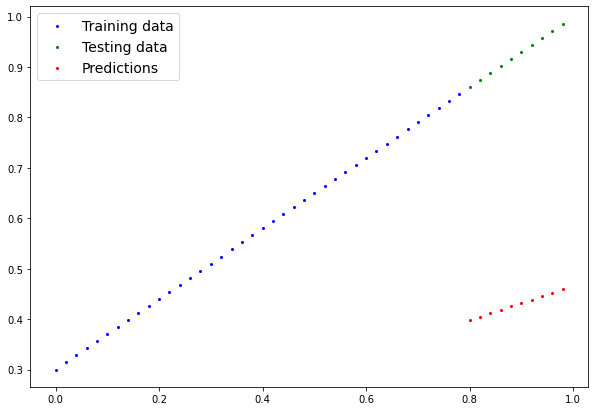

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

오! 예측이 꽤 안 좋아 보입니다...

하지만 모델이 무작위 파라미터 값으로만 예측하고 있다는 점을 떠올리면 당연합니다.

초록 점을 예측하기 위해 파란 점을 아직 보지도 않았습니다.

이제 바꿔볼 시간입니다.

## 3. 모델 학습

현재 모델은 무작위 파라미터로 계산하며 예측하고 있어, 사실상 (무작위로) 추측하는 수준입니다.

이를 바로잡기 위해 내부 파라미터(여기서는 *파라미터*를 패턴이라는 표현으로도 부릅니다), 즉 `nn.Parameter()`와 `torch.randn()`로 무작위 설정했던 `weights`와 `bias`를 데이터에 더 잘 맞도록 업데이트해야 합니다.

하드코딩할 수도 있습니다(기본 직선의 `weight=0.7`, `bias=0.3`을 알고 있으니까요). 하지만 그러면 재미가 없죠.

대부분의 경우 모델에 최적인 파라미터를 미리 알 수 없습니다.

대신, 모델이 스스로 이를 찾아내도록 코드를 작성하는 편이 더 유익합니다.



### PyTorch에서 손실 함수와 옵티마이저 만들기

모델이 스스로 파라미터를 업데이트하려면 몇 가지 요소를 더 추가해야 합니다.

바로 **손실 함수**와 **옵티마이저**입니다.

각각의 역할은 다음과 같습니다:

| 기능 | 역할 | PyTorch에서 어디에 있나? | 일반적 선택 |
| ----- | ----- | ----- | ----- |
| **손실 함수** | 예측(`y_preds`)이 실제 레이블(예: `y_test`)과 얼마나 다른지(오차)를 측정합니다. 낮을수록 좋습니다. | [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions)에 다양한 내장 손실 함수가 있습니다. | 회귀 문제에는 평균 절대 오차(MAE, [`torch.nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)). 이진 분류에는 이진 크로스 엔트로피([`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)). |
| **옵티마이저** | 손실을 최소화하도록 내부 파라미터를 어떻게 갱신할지 모델에 알려줍니다. | [`torch.optim`](https://pytorch.org/docs/stable/optim.html)에서 다양한 구현을 제공합니다. | 확률적 경사하강법(SGD, [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)), Adam 옵티마이저([`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)). |

이제 모델 향상을 위해 사용할 손실 함수와 옵티마이저를 만들어보겠습니다.

어떤 문제냐에 따라 손실 함수와 옵티마이저의 선택이 달라집니다.

하지만 검증된 일반적 선택들이 있습니다. 회귀에는 MAE(숫자 예측), 분류에는 이진 크로스 엔트로피 같은 손실 함수, 그리고 옵티마이저로는 SGD 또는 Adam 등이 자주 쓰입니다.

우리 문제는 숫자를 예측하는 회귀이므로, PyTorch의 `torch.nn.L1Loss()`(MAE)를 손실 함수로 사용하겠습니다.

![what MAE loss looks like for our plot data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png)
*평균 절대 오차(MAE, PyTorch: `torch.nn.L1Loss`)는 두 점(예측과 레이블)의 절대 차이를 구하고 모든 예시에 대해 평균을 취합니다.*

옵티마이저는 `torch.optim.SGD(params, lr)`를 사용하겠습니다. 여기서:

* `params`: 최적화할 대상 모델 파라미터들(예: 앞서 무작위로 설정한 `weights`, `bias`).
* `lr`: **학습률**로, 옵티마이저가 파라미터를 갱신하는 보폭입니다. 높으면 큰 보폭(너무 크면 발산 가능), 낮으면 작은 보폭(너무 작으면 수렴이 매우 느림). 학습률은 **하이퍼파라미터**입니다. 일반 시작값은 `0.01`, `0.001`, `0.0001` 등이며, 시간이 지남에 따라 조정할 수도 있습니다([학습률 스케줄링](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)).

내용이 많으니 코드를 보며 확인해보겠습니다.

In [14]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

### PyTorch에서 최적화 루프 만들기

좋습니다! 손실 함수와 옵티마이저를 준비했으니 이제 **학습 루프**(및 **테스트 루프**)를 만들 차례입니다.

학습 루프는 모델이 학습 데이터를 순회하며 `features`와 `labels` 간의 관계를 학습하는 과정입니다.

테스트 루프는 모델이 학습 데이터에서 배운 패턴이 테스트 데이터에서 얼마나 잘 작동하는지 평가하는 과정입니다(학습 중에는 모델이 테스트 데이터를 보지 않습니다).

각각을 "루프"라고 부르는 이유는, 각 데이터셋의 각 샘플을 모델이 순회(loop)하기를 원하기 때문입니다.

이를 만들기 위해 [비공식 PyTorch 최적화 루프 송](https://twitter.com/mrdbourke/status/1450977868406673410?s=20)을 테마로 Python `for` 루프를 작성하겠습니다([영상 버전](https://youtu.be/Nutpusq_AFw)도 있습니다).

![the unofficial pytorch optimization loop song](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-optimization-loop-song.png)
*비공식 PyTorch 최적화 루프 송: PyTorch 학습(및 테스트) 루프 단계를 기억하는 재미있는 방법.*

코드가 조금 길더라도 충분히 다룰 수 있습니다.




### PyTorch 학습 루프
학습 루프는 다음 단계들로 구성합니다:

| 번호 | 단계 이름 | 역할 | 코드 예시 |
| ----- | ----- | ----- | ----- |
| 1 | 순전파(Forward pass) | 모델이 학습 데이터를 한 번 통과하며 `forward()` 계산을 수행합니다. | `model(x_train)` |
| 2 | 손실 계산 | 모델 출력(예측)과 정답을 비교하여 얼마나 틀렸는지 평가합니다. | `loss = loss_fn(y_pred, y_train)` |
| 3 | 그래디언트 0으로 초기화 | 옵티마이저의 그래디언트를 0으로 설정(기본적으로 누적되므로)하여 이번 스텝에서 다시 계산할 수 있게 합니다. | `optimizer.zero_grad()` |
| 4 | 손실에 대해 역전파 수행 | 업데이트할 모든 파라미터(`requires_grad=True`)에 대해 손실의 그래디언트를 계산합니다. 이를 **역전파**라고 합니다. | `loss.backward()` |
| 5 | 옵티마이저로 갱신(**경사하강**) | 손실 그래디언트에 따라 `requires_grad=True`인 파라미터를 갱신합니다. | `optimizer.step()` |

![pytorch training loop annotated](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png)

> **참고:** 위 순서는 한 가지 예시일 뿐이며, 경험이 쌓이면 PyTorch 학습 루프는 꽤 유연하게 만들 수 있음을 알게 됩니다.
>
> 순서에 대한 경험적 규칙:
> * 역전파(`loss.backward()`)를 수행하기 전에 손실(`loss = ...`)을 계산합니다.
> * 모든 파라미터에 대한 손실 그래디언트를 계산하기 전에(`loss.backward()`) 그래디언트를 0으로 초기화합니다(`optimizer.zero_grad()`).
> * 역전파 후(`loss.backward()`) 옵티마이저 스텝을 진행합니다(`optimizer.step()`).

역전파와 경사하강의 내부 동작을 이해하기 위한 자료는 추가 학습 섹션을 참고하세요.



### PyTorch 테스트 루프

테스트 루프(모델 평가)는 일반적으로 다음 단계를 포함합니다:

| 번호 | 단계 이름 | 역할 | 코드 예시 |
| ----- | ----- | ----- | ----- |
| 1 | 순전파(Forward pass) | 모델이 테스트 데이터를 한 번 통과하며 `forward()` 계산을 수행합니다. | `model(x_test)` |
| 2 | 손실 계산 | 모델 출력(예측)과 정답을 비교하여 얼마나 틀렸는지 평가합니다. | `loss = loss_fn(y_pred, y_test)` |
| 3 | 평가 지표 계산(선택) | 손실 외에도 테스트 세트 정확도 등 추가 평가 지표를 계산할 수 있습니다. | 사용자 정의 함수 |

테스트 루프에는 역전파(`loss.backward()`)나 옵티마이저 스텝(`optimizer.step()`)이 없습니다. 테스트 동안에는 모델의 파라미터가 변경되지 않기 때문입니다(이미 학습에서 계산 완료). 테스트에서는 모델의 순전파 결과만 관심 대상입니다.

![pytorch annotated testing loop](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png)

이제 위 내용을 모두 합쳐 모델을 **100 에포크**(데이터에 대한 순전파 횟수) 동안 학습하고, 10 에포크마다 평가해보겠습니다.


In [15]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


오, 보이시나요! 에포크가 진행될수록 손실이 감소하는 것 같습니다. 그림으로 확인해보겠습니다.

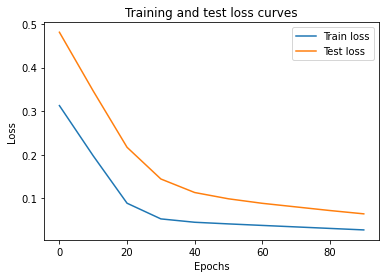

In [16]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

좋습니다! **손실 곡선**이 시간이 지남에 따라 손실이 감소함을 보여줍니다. 손실은 모델이 얼마나 *틀렸는지*를 나타내므로 낮을수록 좋습니다.

그런데 왜 손실이 줄었을까요?

손실 함수와 옵티마이저 덕분에 모델의 내부 파라미터(`weights`, `bias`)가 데이터의 근본적인 패턴을 더 잘 반영하도록 업데이트되었기 때문입니다.

이제 모델의 [`.state_dict()`](https://pytorch.org/tutorials/recipes/recipes/what_is_state_dict.html)를 확인하여, 우리가 설정했던 원래 가중치와 편향 값에 얼마나 가까워졌는지 살펴보겠습니다.



In [17]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


와! 정말 멋집니다.

우리 모델이 `weight`와 `bias`의 원래 값에 매우 가까운 값을 학습했습니다(더 오래 학습하면 더 가까워질 것입니다).

> **연습:** 위의 `epochs` 값을 200으로 바꿔보세요. 손실 곡선과 모델의 가중치/편향 값에 어떤 변화가 생기나요?

완벽히 *정확하게* 맞추지는 못할 것입니다(특히 더 복잡한 데이터셋에서는). 하지만 괜찮습니다. 근사치만으로도 매우 많은 일을 할 수 있습니다.

이것이 머신러닝/딥러닝의 핵심 아이디어입니다. **데이터를 설명하는 이상적인 값들이 존재**하며, 이를 수작업으로 찾는 대신 **모델을 학습시켜 프로그램적으로 찾아내게** 할 수 있습니다.

## 4. 학습된 PyTorch 모델로 예측하기(추론)

모델을 학습했다면, 당연히 예측을 하고 싶을 것입니다.

학습/테스트 코드에서 이미 일부를 보았으며, 학습/테스트 루프 외부에서도 절차는 유사합니다.

PyTorch 모델로 예측(추론)할 때 기억할 세 가지:

1. 모델을 평가 모드로 설정합니다(`model.eval()`).
2. 추론 모드 컨텍스트 매니저를 사용해 예측합니다(`with torch.inference_mode(): ...`).
3. 모든 예측은 같은 디바이스에 있는 객체들로 수행합니다(예: 데이터와 모델 모두 GPU 또는 모두 CPU).

위 첫 두 항목은 학습 중에는 유용하지만 추론에는 불필요한 내부 계산/설정을 끄기 때문에(계산이 더 빨라짐), 세 번째 항목은 크로스 디바이스 에러를 방지합니다.

In [18]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

좋습니다! 학습된 모델로 예측을 만들었으니, 어떻게 보이는지 확인해보겠습니다.

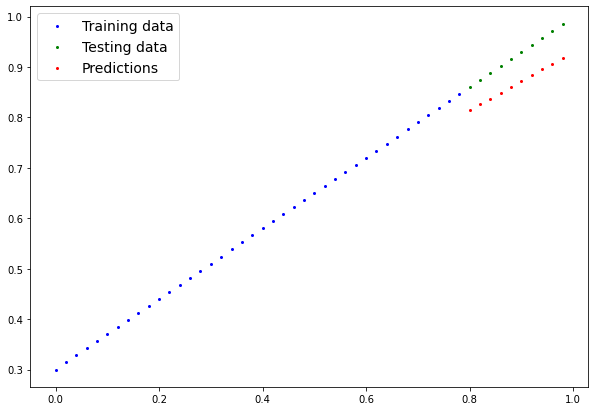

In [19]:
plot_predictions(predictions=y_preds)

좋습니다! 빨간 점들이 이전보다 훨씬 가까워졌습니다!

이제 PyTorch에서 모델 저장과 불러오기로 넘어가겠습니다.

## 5. PyTorch 모델 저장과 불러오기

PyTorch 모델을 학습했다면, 저장하여 어딘가로 내보내고 싶을 가능성이 큽니다.

예를 들어, Google Colab이나 로컬 GPU에서 학습한 모델을 다른 사람이 사용할 수 있는 애플리케이션으로 내보낼 수 있습니다.

혹은 모델 학습 진행 상태를 저장해두고 나중에 다시 불러오고 싶을 수도 있습니다.

PyTorch에서 모델을 저장/불러올 때 알아두어야 할 대표적인 방법은 세 가지입니다(아래 내용은 [PyTorch 저장/불러오기 가이드](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)에서 발췌).

| PyTorch 메서드 | 역할 | 
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Python의 [`pickle`](https://docs.python.org/3/library/pickle.html) 유틸리티로 직렬화된 객체를 디스크에 저장합니다. 모델, 텐서, 딕셔너리 등 다양한 Python 객체를 저장할 수 있습니다. | 
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | `pickle`의 역직렬화 기능으로 직렬화된 Python 객체 파일(모델, 텐서, 딕셔너리 등)을 메모리로 로드합니다. 또한 로드할 디바이스(CPU, GPU 등)를 지정할 수 있습니다. |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| 저장된 `state_dict()` 객체를 이용해 모델의 파라미터 딕셔너리(`model.state_dict()`)를 로드합니다. | 

> **참고:** [Python `pickle` 문서](https://docs.python.org/3/library/pickle.html)에 따르면 `pickle` 모듈은 **안전하지 않습니다**. 즉, 신뢰할 수 있는 데이터만 역직렬화(로드)해야 합니다. PyTorch 모델을 로드할 때도 마찬가지로 신뢰할 수 있는 출처의 저장된 모델만 사용하세요.

### PyTorch 모델의 `state_dict()` 저장하기

추론(예측)을 위한 모델 저장/불러기의 [권장 방법](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)은 모델의 `state_dict()`를 저장하고 불러오는 것입니다.

단계는 다음과 같습니다:

1. Python의 `pathlib` 모듈로 `models`라는 저장 디렉터리를 생성합니다.
2. 모델을 저장할 파일 경로를 생성합니다.
3. `torch.save(obj, f)`를 호출합니다. 여기서 `obj`는 대상 모델의 `state_dict()`, `f`는 저장할 파일 경로입니다.

> **참고:** PyTorch에서 저장된 모델/객체 파일 확장자는 보통 `.pt` 또는 `.pth`를 사용합니다(예: `saved_model_01.pth`).


In [20]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [21]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-rw-r-- 1 daniel daniel 1063 May 10 10:26 models/01_pytorch_workflow_model_0.pth


### 저장된 PyTorch 모델의 `state_dict()` 불러오기

이제 `models/01_pytorch_workflow_model_0.pth`에 저장된 모델 `state_dict()`가 있으므로, `torch.nn.Module.load_state_dict(torch.load(f))`로 로드할 수 있습니다(여기서 `f`는 저장된 `state_dict()`의 파일 경로).

왜 `torch.nn.Module.load_state_dict()` 안에서 `torch.load()`를 호출할까요?

우리는 *전체* 모델이 아니라, 학습된 파라미터의 딕셔너리인 `state_dict()`만 저장했기 때문입니다. 따라서 먼저 `torch.load()`로 `state_dict()`를 로드한 뒤, 이를 모델의 새 인스턴스(= `nn.Module`을 상속한 클래스)에 전달해야 합니다.

왜 전체 모델을 저장하지 않을까요?

[`state_dict()` 대신 전체 모델을 저장](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model)하는 것이 더 직관적일 수 있지만, PyTorch 문서를 인용하자면(강조는 필자 추가):

> 이 방식의 단점 *(전체 모델 저장)* 은 직렬화된 데이터가 저장 당시의 특정 클래스와 디렉터리 구조에 종속된다는 점입니다…
>
> 이로 인해, 다른 프로젝트에서 사용하거나 리팩터링 이후에 코드가 여러 방식으로 깨질 수 있습니다.

따라서 우리는 보다 유연한 `state_dict()`만 저장/불러오는 방법을 사용합니다. 다시 말해, 모델 파라미터의 딕셔너리만 다루는 것입니다.

`torch.nn.Module`을 상속한 `LinearRegressionModel()`의 새 인스턴스를 만든 뒤, 내장 메서드 `load_state_dict()`로 시험해보겠습니다.

In [22]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

훌륭합니다! 정상적으로 일치하는 것 같습니다.

이제 로드한 모델을 테스트 데이터로 추론(예측)해보겠습니다.

PyTorch에서 추론할 때의 규칙을 기억하시나요?

기억이 안 난다면 다시 상기해보겠습니다:

<details>
    <summary>PyTorch 추론 규칙</summary>
    <ol>
      <li> 모델을 평가 모드로 설정합니다(<code>model.eval()</code>). </li>
      <li> 추론 모드 컨텍스트 매니저를 사용해 예측합니다(<code>with torch.inference_mode(): ...</code>). </li>
      <li> 모든 예측은 같은 디바이스에 있는 객체들로 수행합니다(예: 데이터와 모델 모두 GPU 또는 모두 CPU).</li>
    </ol> 
</details>



In [23]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

이제 로드한 모델로 예측을 만들었으니, 이전 모델의 예측과 동일한지 확인해보겠습니다.

In [24]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

좋습니다!

로드한 모델의 예측이 저장 전 모델의 예측과 동일한 것으로 보입니다. 이는 모델 저장/불러오기가 예상대로 작동했음을 의미합니다.

> **참고:** PyTorch 모델을 저장/불러오는 다른 방법들도 있지만, 이는 추가 학습과 참고 자료로 남겨두겠습니다. 자세한 내용은 [PyTorch 저장/불러오기 가이드](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models)를 참고하세요. 

## 6. 통합하기 (Putting it all together)

지금까지 꽤 많은 내용을 다뤘습니다.

하지만 연습이 쌓이면, 위의 단계들을 길을 산책하듯 자연스럽게 수행하게 될 것입니다.

이제 지금까지 해온 모든 것을 한데 모아보겠습니다.

다만 이번에는 코드를 디바이스 무관(device-agnostic)하게 작성하겠습니다(사용 가능한 GPU가 있으면 GPU를, 없다면 CPU를 사용하도록 기본값을 둡니다).

이 섹션에서는 위에서 이미 다룬 내용을 다시 수행하므로 주석을 최소화하겠습니다.

먼저 필요한 표준 라이브러리들을 임포트합니다.

> **참고:** Google Colab을 사용하는 경우, GPU 설정은 Runtime -> Change runtime type -> Hardware acceleration -> GPU로 이동하여 설정할 수 있습니다. 이 작업을 하면 Colab 런타임이 초기화되어 저장된 변수들이 사라집니다.

In [25]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.11.0'

이제 디바이스 무관 코드를 위해, 사용 가능하다면 `device="cuda"`, 그렇지 않으면 `device="cpu"`로 설정하겠습니다.



In [26]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


GPU에 액세스할 수 있다면, 위 출력은 다음과 같을 것입니다:

```
Using device: cuda
```
그렇지 않으면 이후 계산은 CPU에서 수행됩니다. 작은 데이터셋에는 괜찮지만, 큰 데이터셋에서는 시간이 더 걸릴 수 있습니다.

### 6.1 데이터

앞서와 같이 데이터를 생성해보겠습니다.

먼저 `weight`와 `bias` 값을 하드코딩합니다.

그다음 0에서 1까지의 숫자 구간을 만들어 `X` 값으로 사용합니다.

마지막으로 `X` 값과 `weight`, `bias`를 이용해 선형 회귀 수식(`y = weight * X + bias`)으로 `y`를 생성합니다.

In [27]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

훌륭합니다!

이제 데이터가 준비되었으니, 학습/테스트 세트로 분할하겠습니다.

학습 80%, 테스트 20%의 비율을 사용하겠습니다.

In [28]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

좋습니다, 정상적으로 보이는지 시각화하여 확인하겠습니다.

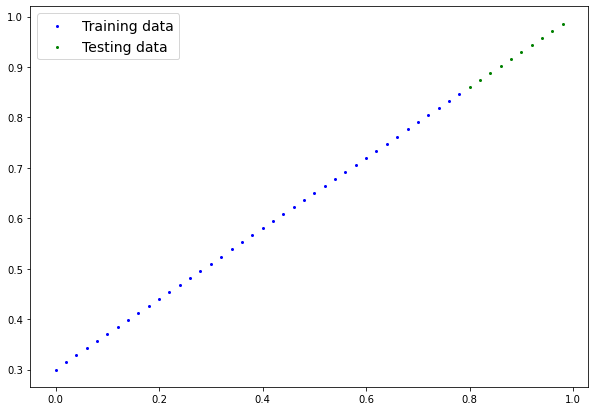

In [29]:
# Note: If you've reset your runtime, this function won't work, 
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 PyTorch 선형 모델 구축

데이터가 준비되었으니 이제 모델을 만들 차례입니다.

앞서와 동일한 스타일의 모델을 만들되, 이번에는 `nn.Parameter()`로 가중치와 편향을 직접 정의하는 대신 [`nn.Linear(in_features, out_features)`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)를 사용하겠습니다.

여기서 `in_features`는 입력 데이터의 차원 수, `out_features`는 출력할 차원 수입니다.

우리의 경우 각 레이블(`y`)당 입력 특성(`X`)이 `1`개이므로 둘 다 `1`입니다.

![comparison of nn.Parameter Linear Regression model and nn.Linear Linear Regression model](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png)
*`nn.Parameter`로 선형 회귀 모델을 만드는 방법과 `nn.Linear`를 사용하는 방법 비교. `torch.nn` 모듈에는 널리 쓰이는 다양한 신경망 레이어를 포함해 미리 구현된 연산들이 더 많이 있습니다.*


In [30]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

`model_1.state_dict()`의 출력에서 보듯, `nn.Linear()` 레이어가 무작위 `weight`와 `bias` 파라미터를 생성했습니다.

이제 가능하다면 모델을 GPU에 올려보겠습니다.

PyTorch 객체의 디바이스는 `.to(device)`로 변경할 수 있습니다.

먼저 모델의 현재 디바이스를 확인해보겠습니다.

In [31]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

좋습니다, 기본적으로 모델이 CPU에 있는 것으로 보입니다.

가능하다면 GPU로 변경하겠습니다.

In [32]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

좋습니다! 디바이스 무관 코드 덕분에, 위 셀은 GPU 사용 가능 여부와 관계없이 동작합니다.

CUDA 지원 GPU에 액세스할 수 있다면 다음과 같은 출력이 보일 것입니다:

```
device(type='cuda', index=0)
```

### 6.3 학습

학습 루프와 테스트 루프를 만들 시간입니다.

먼저 손실 함수와 옵티마이저가 필요합니다.

앞서 사용한 `nn.L1Loss()`와 `torch.optim.SGD()`를 그대로 사용하겠습니다.

학습 중 파라미터를 갱신하려면 새 모델의 파라미터(`model.parameters()`)를 옵티마이저에 전달해야 합니다.

이전에도 잘 작동했던 학습률 `0.1`을 다시 사용하겠습니다.




In [33]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

좋습니다. 손실 함수와 옵티마이저가 준비되었으니, 학습/테스트 루프를 사용해 모델을 학습하고 평가해보겠습니다.

이번 단계에서 이전 학습 루프와 다른 점은 데이터도 대상 `device`로 옮긴다는 것입니다.

이미 `model_1.to(device)`로 모델은 대상 `device`에 올렸습니다.

데이터도 동일하게 옮겨줍니다.

이렇게 하면 모델이 GPU에 있으면 데이터도 GPU에 있고(반대의 경우도 동일), 일관되게 동작합니다.

이번에는 한 단계 더 나아가 `epochs=1000`으로 설정하겠습니다.

PyTorch 학습 루프 단계가 필요하다면 아래를 참고하세요.

<details>
    <summary>PyTorch 학습 루프 단계</summary>
    <ol>
        <li><b>순전파</b> - 모델이 학습 데이터를 한 번 통과하며 <code>forward()</code> 계산을 수행합니다 (<code>model(x_train)</code>).</li>
        <li><b>손실 계산</b> - 모델의 출력(예측)을 정답과 비교해 얼마나 틀렸는지 평가합니다 (<code>loss = loss_fn(y_pred, y_train)</code>).</li>
        <li><b>그래디언트 0으로 초기화</b> - 옵티마이저의 그래디언트를 0으로 설정합니다(기본은 누적). 특정 학습 스텝을 위해 다시 계산할 수 있게 합니다 (<code>optimizer.zero_grad()</code>).</li>
        <li><b>손실에 대해 역전파</b> - 갱신 대상 모든 파라미터(<code>requires_grad=True</code>)에 대해 손실의 그래디언트를 계산합니다. 이를 <b>역전파</b>라고 합니다 (<code>loss.backward()</code>).</li>
        <li><b>옵티마이저 스텝(경사하강)</b> - 손실 그래디언트에 따라 <code>requires_grad=True</code> 파라미터를 갱신합니다 (<code>optimizer.step()</code>).</li>
    </ol>
</details>

In [34]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


> **참고:** 머신러닝의 무작위성 때문에, CPU에서 학습했는지 GPU에서 학습했는지에 따라(손실과 예측 값 등) 결과가 약간씩 달라질 수 있습니다. 동일한 랜덤 시드를 사용하더라도 마찬가지입니다. 차이가 크다면 에러를 의심해볼 수 있지만, 작다면(이상적으로는 작아야 합니다) 무시해도 됩니다.

좋습니다! 손실이 꽤 낮아 보입니다.

이제 모델이 학습한 파라미터를 확인하고, 우리가 하드코딩했던 원래 파라미터와 비교해보겠습니다.

In [35]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


오! 거의 완벽한 모델에 가깝습니다.

하지만 실제 업무에서는 이상적인 파라미터를 미리 아는 경우가 드뭅니다.

만약 모델이 학습해야 할 파라미터를 처음부터 안다면, 머신러닝의 재미가 줄어들겠죠.

게다가 많은 실제 문제에서는 파라미터 수가 수천만을 넘어가기도 합니다.

손으로 구하는 대신, 컴퓨터가 찾도록 코드를 작성하는 편이 훨씬 낫습니다.

### 6.4 예측 만들기

이제 모델이 학습되었으니, 평가 모드를 켜고 예측을 만들어보겠습니다.

In [36]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

GPU에 있는 데이터로 예측을 수행하면, 위 출력 끝부분에 `device='cuda:0'`가 보일 수 있습니다. 이는 해당 데이터가 CUDA 디바이스 0(제로 인덱싱으로 첫 번째 GPU)에 있음을 의미합니다. 여러 개의 GPU를 사용하게 되면 이 숫자는 더 커질 수 있습니다.

이제 모델의 예측을 시각화해보겠습니다.

> **참고:** pandas, matplotlib, NumPy와 같은 많은 데이터 과학 라이브러리는 GPU에 저장된 데이터를 직접 사용할 수 없습니다. 따라서 CPU에 없는 텐서를 이들 라이브러리 함수에 넘기면 문제가 발생할 수 있습니다. 이를 해결하려면 대상 텐서에 [`.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html)를 호출해 CPU에 위치한 사본을 만들어 사용하세요.

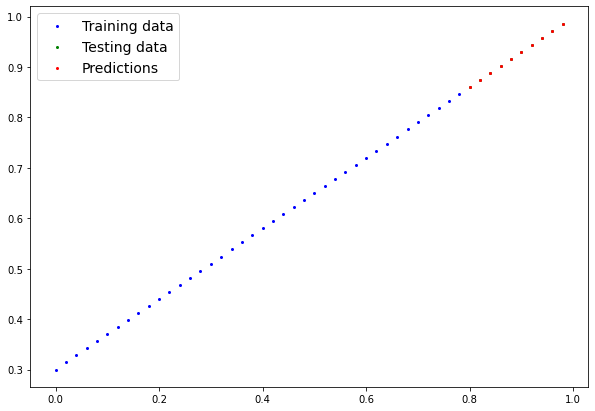

In [37]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

와! 저 빨간 점들을 보세요. 초록 점들과 거의 완벽하게 일치합니다. 에포크를 더 늘린 것이 도움이 된 것 같네요.


### 6.5 모델 저장과 불러오기

모델의 예측이 만족스러우니, 나중에 사용할 수 있도록 파일로 저장하겠습니다.



In [38]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


모든 것이 제대로 동작했는지 확인하기 위해, 저장한 모델을 다시 로드해보겠습니다.

다음 순서로 진행합니다:
* `LinearRegressionModelV2()` 클래스의 새 인스턴스를 생성합니다.
* `torch.nn.Module.load_state_dict()`로 모델의 state dict를 로드합니다.
* 코드의 디바이스 무관성을 보장하기 위해 새 모델 인스턴스를 대상 디바이스로 보냅니다.

In [39]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


이제 로드한 모델을 평가하여, 저장 이전 모델의 예측과 일치하는지 확인할 수 있습니다.

In [40]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

모든 것이 잘 맞아떨어집니다! 좋습니다!

꽤 먼 길을 왔습니다. 이제 PyTorch에서 첫 두 개의 신경망 모델을 구축하고 학습했습니다!

이제 실력을 연습해볼 시간입니다.

## 연습문제

모든 연습문제는 노트북 전반의 코드를 바탕으로 구성되었습니다.

각 주요 섹션마다 하나의 연습문제가 있습니다.

각 연습문제는 해당 섹션을 참고하여 해결할 수 있습니다.

> **참고:** 모든 연습문제에서 코드는 디바이스 무관하게 작성해야 합니다(사용 가능하다면 CPU 또는 GPU 어느 쪽에서도 실행 가능해야 함).

1. 선형 회귀 수식(`weight * X + bias`)으로 직선 데이터셋을 만드세요.
  * `weight=0.3`, `bias=0.9`로 설정하고, 총 데이터 포인트는 최소 100개 이상으로 하세요.
  * 데이터를 학습 80%, 테스트 20%로 분할하세요.
  * 학습/테스트 데이터를 시각화하여 확인하세요.
2. `nn.Module`을 상속하여 PyTorch 모델을 만드세요.
  * 내부에 `requires_grad=True`로 설정된 무작위 초기화 `nn.Parameter()`를 두 개 둡니다(하나는 `weights`, 하나는 `bias`).
  * 1에서 사용한 선형 회귀 함수를 계산하도록 `forward()` 메서드를 구현하세요.
  * 모델을 구성한 뒤 인스턴스를 만들고 `state_dict()`를 확인하세요.
  * **참고:** `nn.Parameter()` 대신 `nn.Linear()`를 사용해도 됩니다.
3. 각각 `nn.L1Loss()`와 `torch.optim.SGD(params, lr)`로 손실 함수와 옵티마이저를 만드세요.
  * 옵티마이저의 학습률을 0.01로 설정하고, 최적화할 파라미터는 2에서 만든 모델의 파라미터로 하세요.
  * 적절한 학습 단계를 수행하는 학습 루프를 300 에포크 동안 작성하세요.
  * 학습 루프는 20 에포크마다 테스트 데이터셋에서 모델을 테스트해야 합니다.
4. 학습된 모델로 테스트 데이터에 대해 예측하세요.
  * 원본 학습/테스트 데이터와 예측 결과를 함께 시각화하세요(**참고:** matplotlib 등 비-CUDA 라이브러리로 그리려면 예측 텐서가 GPU가 아닌 CPU에 있어야 할 수 있습니다).
5. 학습된 모델의 `state_dict()`를 파일로 저장하세요.
  * 2에서 만든 모델 클래스의 새 인스턴스를 생성하고 방금 저장한 `state_dict()`를 로드하세요.
  * 로드한 모델로 테스트 데이터에 대해 예측을 수행하고 4에서의 원래 모델 예측과 일치하는지 확인하세요.

> **자료:** 코스 GitHub의 [연습 노트북 템플릿](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/exercises)과 [해설/해답](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions)을 참고하세요.

## 추가 학습
* [The Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw)을 들어보세요(PyTorch 학습/테스트 루프 단계를 기억하는 데 도움).
* Jeremy Howard의 [What is `torch.nn`, really?](https://pytorch.org/tutorials/beginner/nn_tutorial.html)를 읽어 `torch.nn` 모듈의 동작을 더 깊이 이해하세요.
* [PyTorch documentation cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html)을 10분 정도 훑어보며 다양한 PyTorch 모듈들을 살펴보세요.
* [PyTorch 저장/불러오기 문서](https://pytorch.org/tutorials/beginner/saving_loading_models.html)를 10분 정도 읽어 다양한 저장/불러오기 옵션에 익숙해지세요.
* 아래 자료를 1~2시간 읽거나 시청하여 경사하강법과 역전파(우리 모델 학습을 돕는 핵심 알고리즘 두 가지)의 내부 동작을 개괄적으로 이해하세요.
 * [Gradient descent 위키피디아](https://en.wikipedia.org/wiki/Gradient_descent)
 * Robert Kwiatkowski의 [Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)
 * 3Blue1Brown의 [Gradient descent, how neural networks learn](https://youtu.be/IHZwWFHWa-w)
 * 3Blue1Brown의 [What is backpropagation really doing?](https://youtu.be/Ilg3gGewQ5U)
 * [Backpropagation 위키피디아](https://en.wikipedia.org/wiki/Backpropagation)
